# 5. Inferência estatística

Seja $X$ uma variável aleatória com função densidade (ou de probabilidade) denotada por $f(x,\theta)$, em que $\theta$ é um **parâmetro desconhecido da população** e que se deseja conhecer. Chamamos de inferência estatística o problema que consiste em especificar um ou mais valores para $\theta$, baseado em uma amostra de X. Há duas formas de estimar $\theta$: estimativas pontuais ou intervalares.

## 5.1 Estimador Pontual

As estimativas pontuais são estimativas de parâmetros populacionais com base em dados amostrais. Por exemplo, se quiséssemos saber a idade média dos eleitores registrados nos EUA, poderíamos fazer uma pesquisa com eleitores registrados e usar a idade média dos entrevistados como uma estimativa pontual da idade média da população como um todo. A média de uma amostra é conhecida como média amostral.

Um estimador paramétrico deve apresentar as seguintes propriedades:

- **Suficiência**: um estimador \\(T(X)\\) é suficiente para \\(\theta\\)  se e somente se \\(T(X)\\) não depender de \\(\theta\\). Por exemplo, o estimador \\(\overline{X}\\) é suficiente para a média populacional, pois a função paramétrica não depende da média populacional \\(\mu\\):

\\[ \overline{X} = T(X) =  \frac{\sum_{i}^{n}x_i}{n} \\] 


- **Consistência**:  um estimador é dito consistente para parâmetro \\[\theta\\] quando, a medida que se aumenta o tamanho **n** da amostra, também aumenta a precisão na estimativa ou seja, considerando \\(T_{n}(X)\\) o estimador de \\(\theta\\) para uma amostra de tamanho n, temos:

\\[  P(\mid T_{n}(X) -\theta \mid > \epsilon) \rightarrow 0, n \rightarrow \infty\\]

- **Não enviesado**: um estimador de \\(\theta\\) é não enviesado (ou não tendencioso) para o parâmetro, se \\(E(T(X)) = \theta\\), para qualquer valor de \\(\theta\\).


- **Eficiência**: Sejam \\(\widehat{\theta}_1\\) e \\(\widehat{\theta}_2\\) dois estimadores não viciados de \\(\theta\\), dizemos que \\(\widehat{\theta}_1\\) é mais eficiente que \\(\widehat{\theta}_2\\) se \\(Var(\widehat{\theta}_1) < Var(\widehat{\theta}_2)\\).


<center><img src=http://drive.google.com/uc?export=view&id=1z6Cat6ENkWG90LWn_fV94Y2lwVetaNsH width="400" height="500" /></center> 



São exemplos de estimadores que satisfazem as quatro propriedades acima:

- Para a média populacional \\(\mu\\)

\\[ \widehat{\mu} = \overline{X} = \frac{\sum_{i}^{n}x_i}{n} \\] 

- para a proporção populacional p (em que \\(x_i = {[0,1]}\\))

\\[ \widehat{p} = \overline{p} = \frac{\sum_{i}^{n}x_i}{n} \\] 

- para a variância populacional \\(\sigma^2\\)

\\[ \widehat{\sigma^2} = s^2 = \frac{\sum_{i}^{n}(x_i-\overline{X})^2}{n-1} \\]

A diferença entre o parâmetro popuacional e o estimador pode ser causada por muitos fatores, incluindo desenho de pesquisa ruim, métodos de amostragem tendenciosos e aleatoriedade inerente ao sorteio de uma amostra de uma população. Vamos investigar estimativas pontuais gerando uma população de dados de idade aleatórios e, em seguida, extraindo uma amostra para estimar a média:

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [2]:
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

population_ages.mean()

43.002372

In [3]:
np.random.seed(10)

sample_ages = np.random.choice(a=population_ages,size=3000)

print('Media Amostral: ',sample_ages.mean())
print('Diferenca entre as medias',population_ages.mean()-sample_ages.mean())

Media Amostral:  42.748666666666665
Diferenca entre as medias 0.2537053333333361


### 5.1.1 Erro Quadrático Médio

Vale ressaltar que nem sempre um estimador eficiente produz um bom resultado. Considere a expressão do Erro Quadrático Médio (EQM) do estimador \\(\widehat{\theta}\\):

\\[ EQM(\widehat{\theta}, \theta) =  E(\epsilon^2) = E(\widehat{\theta}- \theta)^2 \\]

Sendo assim:


\\[ E(\widehat{\theta}- \theta)^2 = E(\widehat{\theta}^2 + \theta^2 - 2\theta \widehat{\theta})\\]
\\[= E(\widehat{\theta})^2 +  E(\theta^2) - 2\theta E(\widehat{\theta}) \\]
\\[ = E(\widehat{\theta})^2 - (E(\widehat{\theta}))^2 + (E(\widehat{\theta}))^2  +  E(\theta^2) - 2\theta E(\widehat{\theta}) \\]
 \\[= Var(\widehat{\theta})+ (E(\widehat{\theta}))^2  + E(\theta^2) - 2\theta E(\widehat{\theta}) \\]
\\[ = Var(\widehat{\theta}) + (E(\widehat{\theta}))^2 + \theta^2 - 2\theta E(\widehat{\theta})  \\]
\\[ = Var(\widehat{\theta}) + [E(\widehat{\theta}) -  \theta] ^2\\]
 
 Nesta expressão $E(\widehat{\theta}) -  \theta$ indica o viés do estimador \\(\widehat{\theta}\\), sendo assim, perceba mesmo que a variância seja pequena, não necessariamente o erro produzido pelo estimador é baixo (exemplificado na figura abaixo).
 
 
 <center><img src=http://drive.google.com/uc?export=view&id=1PvfWpQhexAUqxobkwmAj4JUqT367YXQI width="400" height="400" /></center> 

### 5.1.2 Máxima Verossimilhancia

A Estimativa de Máxima Verossimilhança, simplesmente conhecida como MLE, é uma abordagem probabilística tradicional que pode ser aplicada a dados pertencentes a qualquer distribuição, ou seja, Normal, Poisson, Bernoulli, etc. os parâmetros de distribuição mais prováveis ​​de ocorrer. Por exemplo, digamos que temos dados que são considerados normalmente distribuídos, mas não conhecemos seus parâmetros de média e desvio padrão. A Estimativa de Máxima Verossimilhança pesquisa iterativamente a média e o desvio padrão mais prováveis ​​que poderiam ter gerado a distribuição.

O termo verossimilhança pode ser definido como a possibilidade de que os parâmetros considerados possam gerar os dados. Uma função de verossimilhança é simplesmente a função de probabilidade conjunta da distribuição de dados, conforme equação abaixo.

\\[L(\theta; x_1, x_2, \cdots, x_n) = \prod_{i=1}^{n} f(x_i, \theta)= f(x_1, \theta) f(x_2, \theta) \cdots f(x_n, \theta)\\]

A função de probabilidade conjunta é simplesmente o produto das funções de probabilidade de pontos de dados individuais. 

A maximização da função é realizada ao se diferenciar a função de verossimilhança em relação aos parâmetros de distribuição e igualar a zero.

## 5.2 Estimador Intervalar

A estimção pontual não permite julgar a magnetude do erro cometido na estimativa. Então surge a necessidade de um estimador intervalar (Intervalo de Confiança, IC), que permite construir  um intervalo que é previsto para conter o parâmetro estimado, baseado na distribuição amostral do estimador pontual. A confiança que atribuimos ao intervalo é a probabilidade de que ele irá conter o parâmetro.

Seja \\((1-\alpha)\\) uma probabilidade especificada e L e U funções dos valores amostrais X, de modo que

\\[P(L < \theta <U) =1-\alpha\\]

O intervalo \\((L ,U)\\) é chamado intervalo de confiança e \\((1-\alpha)\\) é o nível deconfiança (NC) associado ao intervalo. Pode-se definir  nível de confiança como a probabilidade de o intervalo conter \\(\theta\\), em outras palavras é a proporção de vezes que o intervalo de confiança realmente contém o parâmetro populacional, supondo que o processo seja repetido um número grande de vezes.

 <center><img src=http://drive.google.com/uc?export=view&id=1q9B2CurquFrblAg43LoWB3zfdDs5g_dQ width="400" height="400" /></center> 

Vamos calcular uma confiança de 95% para nossa estimativa de ponto médio:

In [4]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Usamos stats.norm.ppf(q = 0,975) para obter o valor z-crítico desejado em vez de q = 0,95 porque a distribuição tem duas caudas.

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = population_ages.std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(41.70306406882683, 43.34293593117317)


Vamos criar vários intervalos de confiança e plotá-los para ter uma noção melhor do que significa "capturar" a verdadeira média:

In [8]:
np.random.seed(12)

sample_size = 1000

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    pop_stdev = population_ages.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

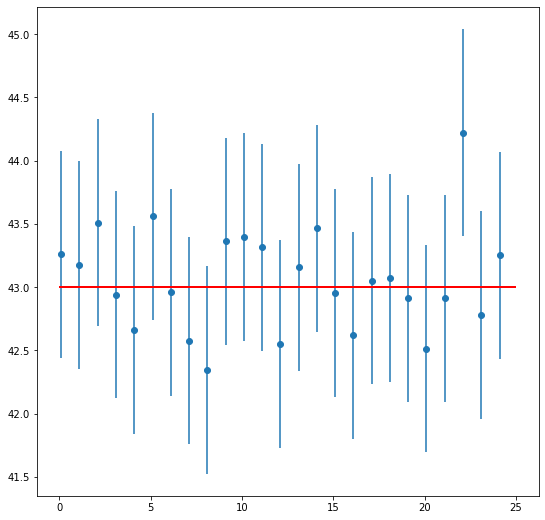

In [6]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=43.0023, 
           linewidth=2.0,
           color="red")